Initially we want to import en_core_web_sm, a small English pipeline that is trained on written web text such as blogs and news that includes, vocabulary, syntax and entites

In [40]:
import en_core_web_sm
nlp = en_core_web_sm.load()

Next we read the csv files from our current directory of both the True and fake news csvs

In [41]:
import pandas as pd

df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')
facebook_fake = pd.read_csv('facebook-fact-check.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [42]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [43]:
facebook_fake.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [44]:
df_true.shape, df_fake.shape,facebook_fake.shape

((21417, 4), (23481, 4), (2282, 12))

In [45]:
df_true['class']=1
df_fake['class']=0

We merge our 2 datasets of real news and fake news with a new feature depicting which news is real news and which are fake

In [46]:
merged_df = pd.concat([df_true,df_fake])

In [9]:
merged_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


After the merge we want to check the features to see if any contain NaN which can throw our model off below we can see there are no NaN within our dataset

In [10]:
merged_df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

After the merge we need to check the balance between our dataset between real and fake, because if one is significantly larger than the other we can overfit to our data

/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

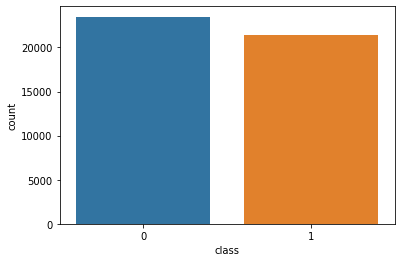

In [11]:
import seaborn as sns
sns.countplot(merged_df['class'])

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

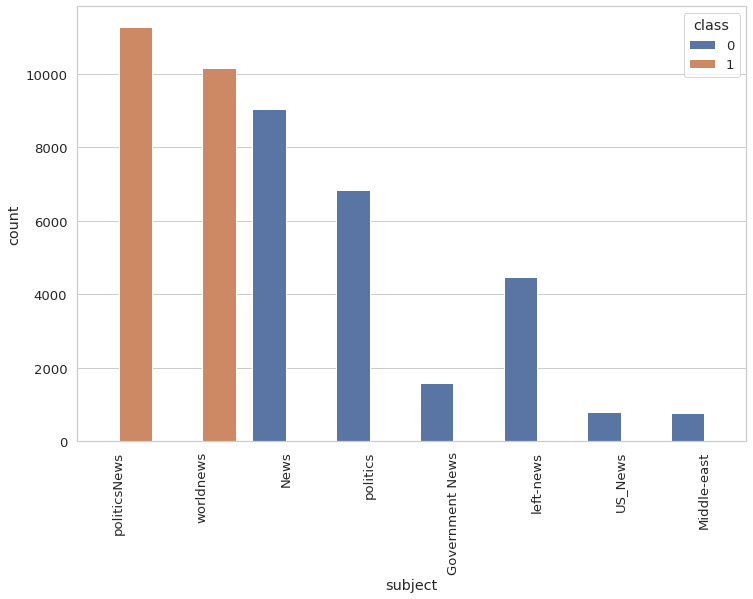

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "class" , data = merged_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [47]:
merged_df['text']=merged_df['text']+ " " + merged_df['title']
merged_df.drop(['title','subject','date'], axis=1,inplace=True, errors='ignore')

In [14]:
merged_df.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [48]:
sample_news_df = merged_df.sample(10000, random_state=786).reset_index(drop=True)
sample_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   class   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


We would now need to initilize the training environment that creates teh transformation pipline. This setup needs to be called before we train or execute and function 

In [15]:
sample_news_df.head()

,text,class
0,Republicans aren t very smart about a lot of t...,0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsin...,0
2,CARACAS (Reuters) - President Nicolas Maduro h...,1
3,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",1
4,BUENOS AIRES (Reuters) - Major parties running...,1


In [49]:
from pycaret.nlp import *

news_nlp = setup(data = sample_news_df, target = 'text', session_id =123)

Description,Value
session_id,123
Documents,10000
Vocab Size,42043
Custom Stopwords,False


In [50]:
%time
lda = create_model('lda',multi_core=True)

In [51]:
%time
lda_df = assign_model(lda)

In [20]:
lda_df.head()

,text,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,smart lot thing unfortunate mental deficit awa...,0,0.740774,0.201665,0.055461,0.002100,Topic 0,0.74
1,gay paypal ceo give rouse speech endorse trump...,0,0.944685,0.018117,0.018627,0.018571,Topic 0,0.94
2,set sight venezuela presidential election rule...,1,0.353702,0.632984,0.012538,0.000776,Topic 1,0.63
3,state legislator apologize say legislature las...,1,0.117313,0.193789,0.445500,0.243398,Topic 2,0.45
4,buenos_aire reuter major party run mid_term co...,1,0.087655,0.660498,0.095844,0.156003,Topic 1,0.66


In [52]:
plot_model(lda, plot = 'topic_distribution')

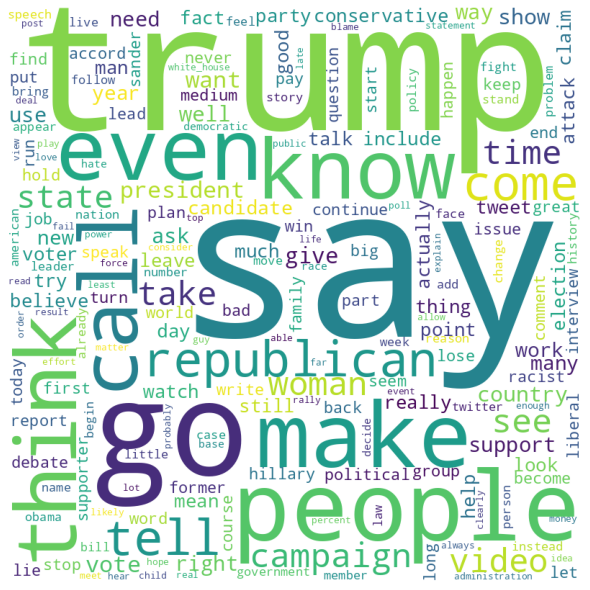

In [22]:
plot_model(lda, plot = 'wordcloud')

In [53]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.153244  0.051013       1        1  33.530096
0      0.053896  0.132474       2        1  32.100759
2      0.174565 -0.045121       3        1  17.302212
3     -0.075217 -0.138366       4        1  17.066933, topic_info=                Term          Freq         Total Category  logprob  loglift
100            trump  13711.000000  13711.000000  Default  30.0000  30.0000
569           police   2714.000000   2714.000000  Default  29.0000  29.0000
216       government   6519.000000   6519.000000  Default  28.0000  28.0000
266         official   4576.000000   4576.000000  Default  27.0000  27.0000
378              man   2943.000000   2943.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
1041  administration    857.450162   2004.619176   Topic4  -5.8245   0.9188
96              tell    997.598503   6172.784379   Topic4  -5.6731  -0.0545
377             make   1036.864650   8417.386618   Topic4  -5.6345  -0.3261
837             work    898.490202   3955.764065   Topic4  -5.7777   0.2858
505              ask    879.711942   3311.221743   Topic4  -5.7989   0.4425

[381 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2839      2  0.997972  abortion
1         1  0.301410    accord
1         2  0.141934    accord
1         3  0.227094    accord
1         4  0.329478    accord
...     ...       ...       ...
837       4  0.227011      work
338       1  0.507436      year
338       2  0.231940      year
338       3  0.142673      year
338       4  0.117894      year

[761 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [54]:
plot_model(lda, plot = 'bigram')

/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils

/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils

After the observations of these models we need to create the dataframe the model will be learning off of. In this case we just want the models to be learning of whether or not the data row is a truthful article or fake any other additional information would be unnecessary data that will just confuse the model especially since the other data types are text based data while our class indicator is only 0 and 1

In [56]:
lda_df.drop(['text','title','subject','date'],axis = 1, inplace=True, errors='ignore')

In [57]:
from pycaret.classification import *

%time
setup(data=lda_df, target='class', silent = True, use_gpu = True)

,Description,Value
0,session_id,2545
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


('clf-default-name',
 True,
 {'parameter': 'Hyperparameters',
  'auc': 'AUC',
  'confusion_matrix': 'Confusion Matrix',
  'threshold': 'Threshold',
  'pr': 'Precision Recall',
  'error': 'Prediction Error',
  'class_report': 'Class Report',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'calibration': 'Calibration Curve',
  'vc': 'Validation Curve',
  'dimension': 'Dimensions',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'boundary': 'Decision Boundary',
  'lift': 'Lift Chart',
  'gain': 'Gain Chart',
  'tree': 'Decision Tree',
  'ks': 'KS Statistic Plot'},
 'lightgbm',
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                 

In [58]:
%time

top5Models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8531,0.9294,0.8350,0.8535,0.8441,0.7053,0.7055,0.9760
lightgbm,Light Gradient Boosting Machine,0.8524,0.9276,0.8326,0.8540,0.8431,0.7038,0.7041,0.0770
ada,Ada Boost Classifier,0.8493,0.9249,0.8251,0.8536,0.8391,0.6974,0.6978,0.3410
rf,Random Forest Classifier,0.8464,0.9220,0.8215,0.8510,0.8359,0.6916,0.6921,0.4930
lr,Logistic Regression,0.8408,0.9180,0.8102,0.8489,0.8289,0.6803,0.6811,0.0480
lda,Linear Discriminant Analysis,0.8367,0.9154,0.8029,0.8465,0.8240,0.6719,0.6728,0.0240
ridge,Ridge Classifier,0.8361,0.0000,0.8020,0.8461,0.8234,0.6707,0.6717,0.0140
svm,SVM - Linear Kernel,0.8355,0.0000,0.8099,0.8403,0.8242,0.6699,0.6710,0.0300
et,Extra Trees Classifier,0.8303,0.9125,0.8005,0.8362,0.8179,0.6591,0.6597,0.4920
knn,K Neighbors Classifier,0.8243,0.8917,0.8161,0.8154,0.8157,0.6478,0.6479,0.0680


Using pycaret's compare_model function we are easily able to observe how accurate different models are with the data frame we set up in the cell above and see different metrics each of the models have. We can use this to observe the results vs having to train different models in separate lines.

In [28]:
predict_model(top5Models[0],data=lda_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8639,0.9392,0.8428,0.8678,0.8551,0.7269,0.7271


,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,Label,Score
0,0,0.740774,0.201665,0.055461,0.002100,Topic 0,0.74,0,0.8496
1,0,0.944685,0.018117,0.018627,0.018571,Topic 0,0.94,0,0.9376
2,1,0.353702,0.632984,0.012538,0.000776,Topic 1,0.63,1,0.9261
3,1,0.117313,0.193789,0.445500,0.243398,Topic 2,0.45,0,0.7154
4,1,0.087655,0.660498,0.095844,0.156003,Topic 1,0.66,1,0.6843
...,...,...,...,...,...,...,...,...,...
9995,0,0.324909,0.209580,0.001335,0.464177,Topic 3,0.46,1,0.5309
9996,0,0.479600,0.455398,0.042682,0.022319,Topic 0,0.48,0,0.6328
9997,0,0.339921,0.001412,0.092621,0.566046,Topic 3,0.57,0,0.9154
9998,1,0.002194,0.611513,0.384043,0.002251,Topic 1,0.61,1,0.8808


/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils

In [29]:
predict_model(top5Models[5])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8391,0.9139,0.8112,0.8482,0.8293,0.6772,0.6778


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label,Score
0,0.012184,0.963315,0.012037,0.012464,0.96,0.0,1.0,0.0,0.0,1,1,0.9921
1,0.065849,0.719925,0.001492,0.212735,0.72,0.0,1.0,0.0,0.0,1,1,0.9696
2,0.035397,0.962961,0.000815,0.000828,0.96,0.0,1.0,0.0,0.0,1,1,0.9914
3,0.007482,0.118074,0.866975,0.007469,0.87,0.0,0.0,1.0,0.0,1,0,0.8974
4,0.993556,0.002247,0.002114,0.002082,0.99,1.0,0.0,0.0,0.0,0,0,0.9831
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002781,0.991399,0.002965,0.002855,0.99,0.0,1.0,0.0,0.0,1,1,0.9937
2997,0.993252,0.002252,0.002241,0.002255,0.99,1.0,0.0,0.0,0.0,0,0,0.9831
2998,0.772256,0.019704,0.032056,0.175984,0.77,1.0,0.0,0.0,0.0,0,0,0.9502
2999,0.791836,0.204317,0.001927,0.001919,0.79,1.0,0.0,0.0,0.0,0,0,0.8976


In [30]:
predict_model(top5Models[6])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8384,0.8374,0.8105,0.8474,0.8286,0.6759,0.6765


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label
0,0.012184,0.963315,0.012037,0.012464,0.96,0.0,1.0,0.0,0.0,1,1
1,0.065849,0.719925,0.001492,0.212735,0.72,0.0,1.0,0.0,0.0,1,1
2,0.035397,0.962961,0.000815,0.000828,0.96,0.0,1.0,0.0,0.0,1,1
3,0.007482,0.118074,0.866975,0.007469,0.87,0.0,0.0,1.0,0.0,1,0
4,0.993556,0.002247,0.002114,0.002082,0.99,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002781,0.991399,0.002965,0.002855,0.99,0.0,1.0,0.0,0.0,1,1
2997,0.993252,0.002252,0.002241,0.002255,0.99,1.0,0.0,0.0,0.0,0,0
2998,0.772256,0.019704,0.032056,0.175984,0.77,1.0,0.0,0.0,0.0,0,0
2999,0.791836,0.204317,0.001927,0.001919,0.79,1.0,0.0,0.0,0.0,0,0


In [31]:
best = compare_models(include = ['lr','dt','knn','dummy','rf','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8480,0.9184,0.8238,0.8511,0.8372,0.6947,0.6951,0.5260
lr,Logistic Regression,0.8381,0.9153,0.8084,0.8438,0.8256,0.6747,0.6754,0.0520
knn,K Neighbors Classifier,0.8281,0.8909,0.8136,0.8225,0.8178,0.6552,0.6554,0.1620
nb,Naive Bayes,0.8151,0.8943,0.7931,0.8132,0.8028,0.6288,0.6293,0.0150
dt,Decision Tree Classifier,0.8081,0.8076,0.7979,0.7979,0.7978,0.6152,0.6154,0.0450
dummy,Dummy Classifier,0.5256,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100


In [38]:
gbc = create_model('gbc', return_train_score = True)

In [39]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Next we will be evaluating how the nlp model lsi(latent semantic indexing) is with the various classification model and how accurate these models are in comparison with our lda classification models

In [62]:
from pycaret.nlp import *

news_nlp2 = setup(data = sample_news_df, target = 'text', session_id =345)

Description,Value
session_id,345
Documents,10000
Vocab Size,42043
Custom Stopwords,False


In [63]:
%time
lsi = create_model('lsi',multi_core=True)

In [31]:
plot_model(lsi, plot = 'topic_distribution')

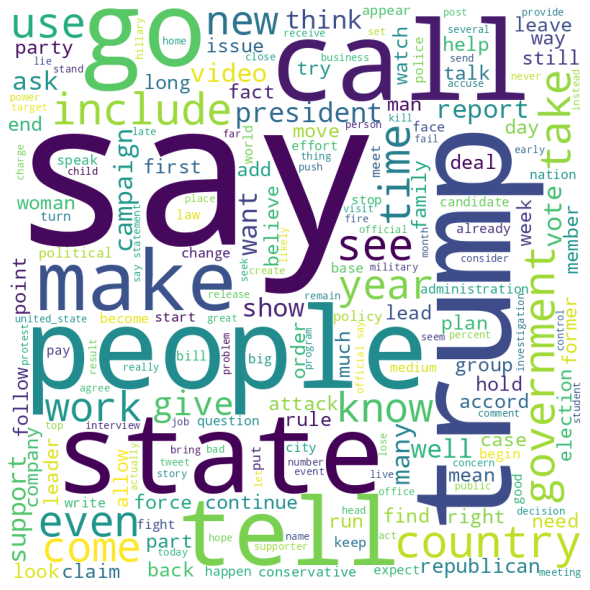

In [33]:
plot_model(lsi, plot = 'wordcloud')

In [37]:
plot_model(lsi, plot = 'bigram')

In [64]:
plot_model(lsi, plot = 'topic_model')

SystemExit: (Type Error): Model not supported for plot = topic_model. Please see docstring for list of available models supported for topic_model.

In [60]:
%time
lsi_df = assign_model(lsi)

In [61]:
lsi_df.head()

,text,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,smart lot thing unfortunate mental deficit awa...,0,3.874398,1.436225,-1.680510,0.863597,Topic 0
1,gay paypal ceo give rouse speech endorse trump...,0,0.469479,0.236164,-0.907820,-0.058721,Topic 0
2,set sight venezuela presidential election rule...,1,14.434023,0.048998,2.890371,-4.389602,Topic 0
3,state legislator apologize say legislature las...,1,5.613969,-3.065180,1.190557,0.154459,Topic 0
4,buenos_aire reuter major party run mid_term co...,1,8.342191,-0.461053,1.844678,-1.246956,Topic 0


In [22]:
lsi_df.drop(['text','title','date'],axis = 1, inplace=True, errors='ignore')

In [23]:
lsi_df.head()

,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,0,3.874401,1.436448,-1.679348,0.861724,Topic 0
1,0,0.469480,0.236169,-0.907906,-0.058633,Topic 0
2,1,14.434028,0.047852,2.888273,-4.400864,Topic 0
3,1,5.613971,-3.065058,1.189866,0.155372,Topic 0
4,1,8.342191,-0.461537,1.845414,-1.246838,Topic 0


In [24]:
from pycaret.classification import *

%time
setup(data=lsi_df, target='class', silent = True, use_gpu = True, data_split_stratify = True)

,Description,Value
0,session_id,6921
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


('clf-default-name',
 True,
 {'parameter': 'Hyperparameters',
  'auc': 'AUC',
  'confusion_matrix': 'Confusion Matrix',
  'threshold': 'Threshold',
  'pr': 'Precision Recall',
  'error': 'Prediction Error',
  'class_report': 'Class Report',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'calibration': 'Calibration Curve',
  'vc': 'Validation Curve',
  'dimension': 'Dimensions',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'boundary': 'Decision Boundary',
  'lift': 'Lift Chart',
  'gain': 'Gain Chart',
  'tree': 'Decision Tree',
  'ks': 'KS Statistic Plot'},
 'lightgbm',
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                 

In [25]:
%time

topModels = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8910,0.9510,0.8840,0.8871,0.8854,0.7815,0.7816,0.4630
et,Extra Trees Classifier,0.8910,0.9543,0.8831,0.8878,0.8853,0.7814,0.7817,0.4560
lightgbm,Light Gradient Boosting Machine,0.8883,0.9518,0.8813,0.8841,0.8826,0.7760,0.7762,0.0840
gbc,Gradient Boosting Classifier,0.8831,0.9506,0.8786,0.8766,0.8775,0.7658,0.7660,0.9000
knn,K Neighbors Classifier,0.8797,0.9361,0.8690,0.8776,0.8731,0.7588,0.7590,0.1600
lr,Logistic Regression,0.8696,0.9350,0.8693,0.8591,0.8639,0.7387,0.7391,0.0870
ada,Ada Boost Classifier,0.8674,0.9429,0.8687,0.8555,0.8619,0.7344,0.7347,0.3200
ridge,Ridge Classifier,0.8626,0.0000,0.8420,0.8665,0.8537,0.7242,0.7249,0.0150
lda,Linear Discriminant Analysis,0.8624,0.9289,0.8420,0.8662,0.8536,0.7239,0.7247,0.0200
svm,SVM - Linear Kernel,0.8598,0.0000,0.8681,0.8503,0.8560,0.7197,0.7251,0.0320


In [26]:
rf = create_model('rf', return_train_score = True)
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6921, verbose=0,
                       warm_start=False)


In [27]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
tuned_rf = tune_model(rf, optimize='Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8614,0.9305,0.8769,0.8391,0.8576,0.7228,0.7234
1,0.8843,0.9561,0.8739,0.8818,0.8778,0.7679,0.7680
2,0.9029,0.9583,0.9129,0.8863,0.8994,0.8055,0.8059
3,0.8971,0.9672,0.8802,0.9018,0.8909,0.7936,0.7938
4,0.8900,0.9453,0.9012,0.8725,0.8866,0.7799,0.7802
5,0.8671,0.9483,0.8443,0.8731,0.8584,0.7333,0.7337
6,0.8957,0.9549,0.9072,0.8783,0.8925,0.7913,0.7917
7,0.8929,0.9469,0.8922,0.8843,0.8882,0.7853,0.7854
8,0.8943,0.9479,0.8832,0.8939,0.8886,0.7880,0.7881
